In [57]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
sx = qt.sigmax();sy = qt.sigmay(); sz = qt.sigmaz(); s0 = qt.qeye(2); sm = qt.sigmam(); sp = qt.sigmap()

In [157]:
# Cavity and qubit interacting by a a^+ s_z in qutip
# Size of the space N, coherent state of the cavity alpha, initial state of the qubit is the supperposition
# Time evolution with a collapse operator

N = 10 # Size of the boson space
alpha = 2  #Magnitude of the coherent state


psi0_q = (qt.basis(2,0)+qt.basis(2,1)).unit() # Initial state of the qubit (two levels, eg. S-T)
psi0_r = qt.coherent(N, alpha)  # Initial state of the cavity (coherent state)
psi0 = qt.tensor(psi0_r, psi0_q) # Initial state of the system (tensor product)

a = qt.destroy(N)  # Destroy operator of the cavity
unityN = qt.qeye(N)    # Identity operator of the cavity

# Hamiltonian
om_q = 0
om_r = 0
V = 1
H = V* qt.tensor(a.dag()*a, sz) + om_q*qt.tensor(unityN, sz) + om_r*qt.tensor(a*a.dag(), s0) 

# Time list
tlist = np.linspace(0, 50, 100)


# Observables
Q = qt.tensor(a.dag()+a, s0)/2 # Quadrature of the cavity
P = qt.tensor(1j*(a.dag()-a), s0)/2 # Quadrature of the cavity

# Relaxation of the qubit
gamma = 0.01
gz = 0.01
c_ops = [np.sqrt(gamma)*qt.tensor(unityN, sm), np.sqrt(gamma)*qt.tensor(unityN, sp)]










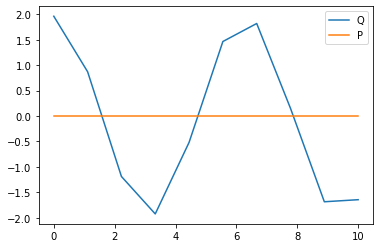

In [89]:
#plot n, sz, Q 
plt.plot(tlist, result.expect[0], label="Q")
plt.plot(tlist, result.expect[1], label="P")

plt.legend()
plt.show()


## Monte carlo

In [158]:
r = qt.mcsolve(H, psi0, tlist, c_ops,  ntraj=10)

10.0%. Run time:   0.18s. Est. time left: 00:00:00:01
20.0%. Run time:   0.20s. Est. time left: 00:00:00:00
30.0%. Run time:   0.21s. Est. time left: 00:00:00:00
40.0%. Run time:   0.21s. Est. time left: 00:00:00:00
50.0%. Run time:   0.21s. Est. time left: 00:00:00:00
60.0%. Run time:   0.21s. Est. time left: 00:00:00:00
70.0%. Run time:   0.21s. Est. time left: 00:00:00:00
80.0%. Run time:   0.21s. Est. time left: 00:00:00:00
90.0%. Run time:   0.21s. Est. time left: 00:00:00:00
100.0%. Run time:   0.21s. Est. time left: 00:00:00:00
Total run time:   0.24s


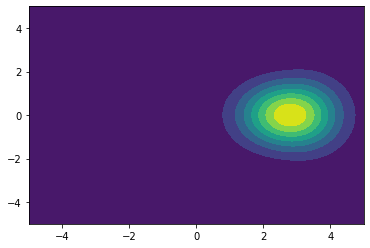

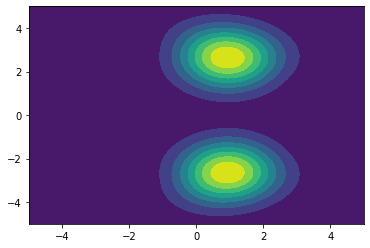

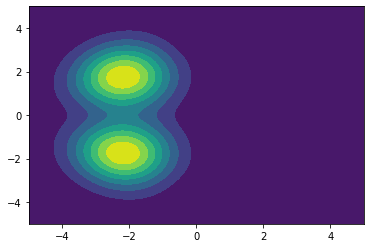

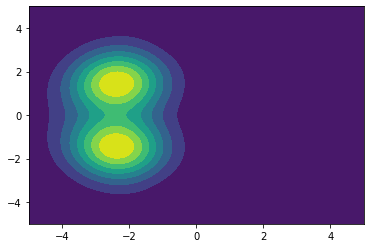

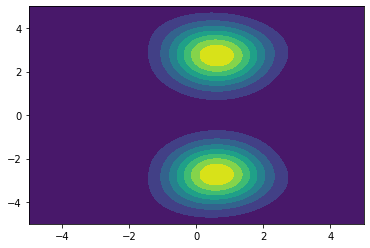

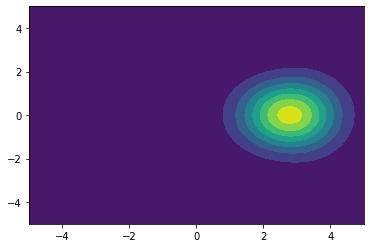

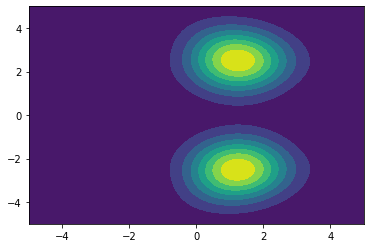

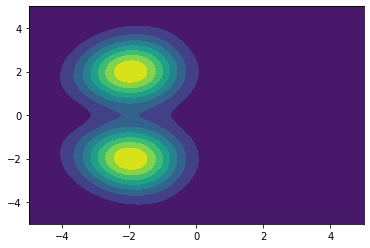

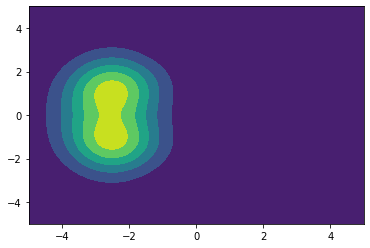

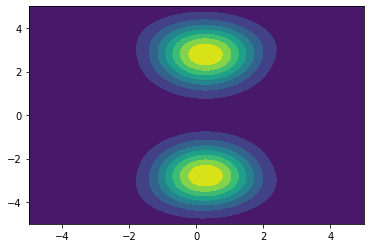

In [159]:
# Plot the cavity quadrature
xvec = np.linspace(-5,5,200)
for traj in [r.states[0]]:
    #plot q function   
    for i in range(0, len(tlist)):
        if i % 10 == 0:
            Q_func = qt.qfunc(traj[i].ptrace(0),xvec,xvec)
            plt.contourf(xvec, xvec, Q_func)
            plt.show()
    

Quantum object: dims = [[10, 2], [1, 1]], shape = (20, 1), type = ket
Qobj data =
[[0.09569607]
 [0.09569607]
 [0.19139682]
 [0.19139682]
 [0.27064746]
 [0.27064746]
 [0.31265091]
 [0.31265091]
 [0.31213638]
 [0.31213638]
 [0.28084187]
 [0.28084187]
 [0.22472828]
 [0.22472828]
 [0.18084276]
 [0.18084276]
 [0.10484948]
 [0.10484948]
 [0.11272664]
 [0.11272664]]
Quantum object: dims = [[10, 2], [1, 1]], shape = (20, 1), type = ket
Qobj data =
[[0.09569607]
 [0.09569607]
 [0.19139682]
 [0.19139682]
 [0.27064746]
 [0.27064746]
 [0.31265091]
 [0.31265091]
 [0.31213638]
 [0.31213638]
 [0.28084187]
 [0.28084187]
 [0.22472828]
 [0.22472828]
 [0.18084276]
 [0.18084276]
 [0.10484948]
 [0.10484948]
 [0.11272664]
 [0.11272664]]
Quantum object: dims = [[10, 2], [1, 1]], shape = (20, 1), type = ket
Qobj data =
[[0.09569607]
 [0.09569607]
 [0.19139682]
 [0.19139682]
 [0.27064746]
 [0.27064746]
 [0.31265091]
 [0.31265091]
 [0.31213638]
 [0.31213638]
 [0.28084187]
 [0.28084187]
 [0.22472828]
 [0.224728

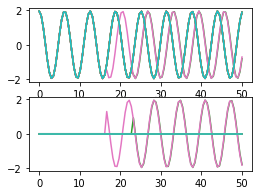

In [160]:
# Plot the cavity quadrature
#xvec = np.linspace(-5,5,200)
fig, axes = plt.subplots(2, 1, figsize=(4,3))
for traj in r.states:
    #plot q function   
    print(traj[0])
    # plot two subplots vertically
    

    axes[0].plot(tlist,[qt.expect(Q,traj[k]) for k in range(len(traj))]) 
    axes[1].plot(tlist,[qt.expect(P,traj[k]) for k in range(len(traj))]) 